# Visualization with Seaborn 

Seaborn provides an API on the top of matplotlib which uses sane plot & color defaults uses simple functions for common statistical plot types, and which integrates with the functionality provided by Pandas dataframes. 

[seaborn introduction]('http://stanford.edu/~mwaskom/software/seaborn/introduction.html')
>Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays. Seaborn's goal is similar to those of R's ggplot, but it takes a different appraoach with an imperative and object-oriented sty;e that tries to make it strai

In [2]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

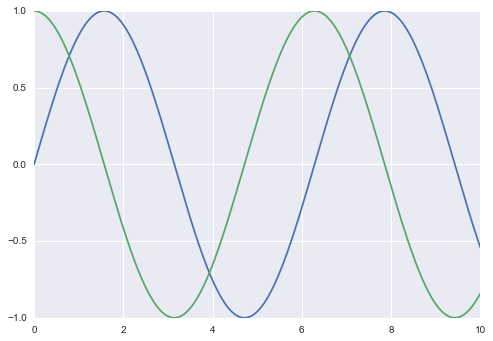

In [3]:
x = np.linspace(0,10,1000)
plt.plot(x,np.sin(x), x, np.cos(x))

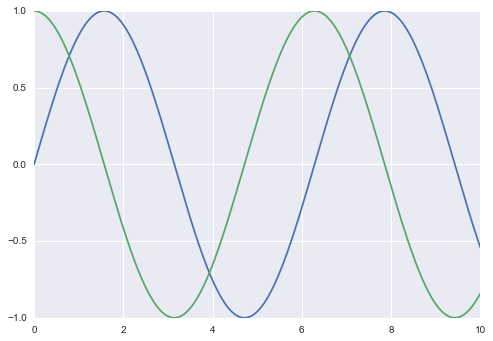

In [4]:
import seaborn as sns
sns.set()
plt.plot(x,np.sin(x), x, np.cos(x))

# Expporing Seaborn Plots

The main idea of Seaborn is that it can create complicated plot types from Pandas data with relatively simple commands. 


## Histograms, KDE, and Densities

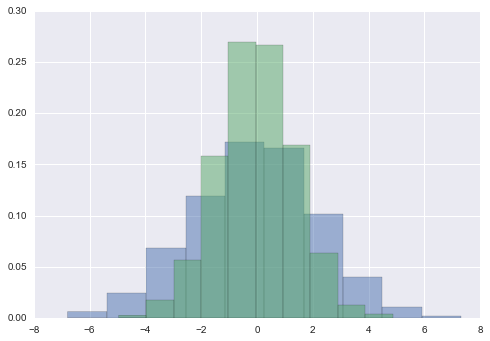

In [9]:
data = np.random.multivariate_normal([0,0], [[5,2],[2,2]], size =2000)
data = pd.DataFrame(data, columns=['x','y'])

for col in 'xy':
    plt.hist(data[col], normed=True,alpha=0.5)

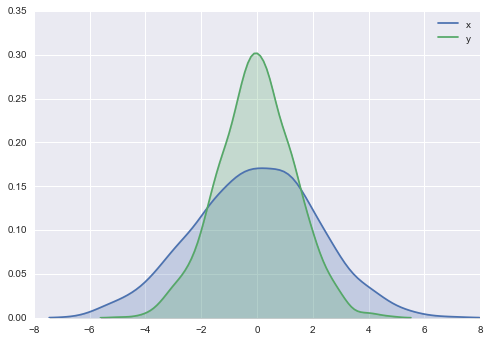

In [10]:
for col in 'xy':
    sns.kdeplot(data[col],shade=True)

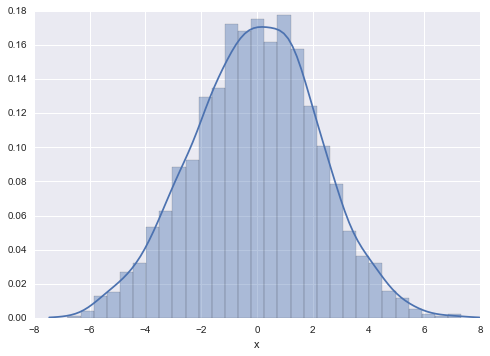

In [11]:
sns.distplot(data['x'])

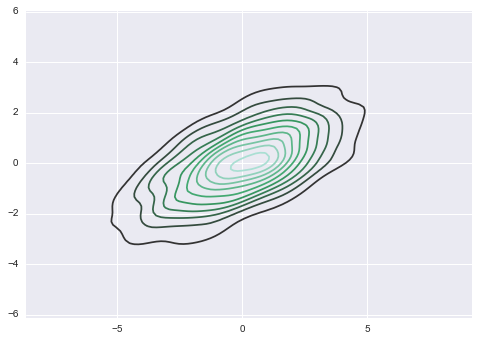

In [12]:
sns.kdeplot(data)

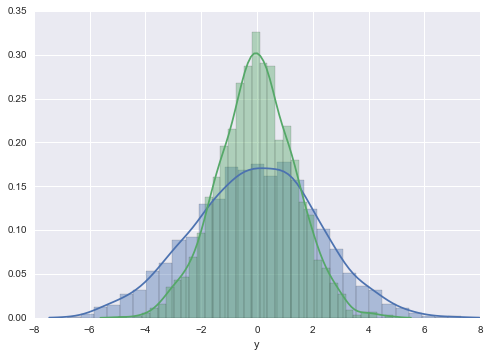

In [14]:
for col in 'xy':
    sns.distplot(data[col])

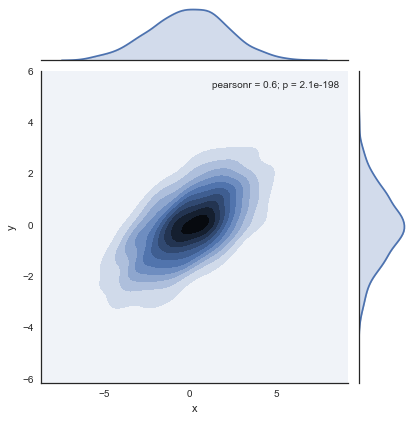

In [21]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='kde')

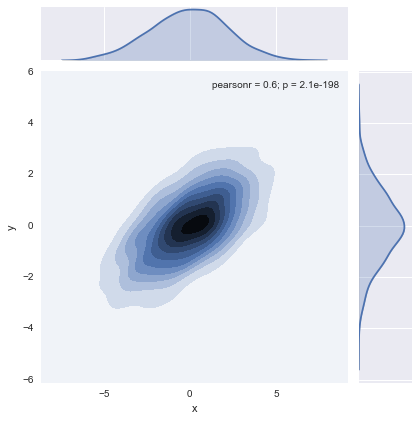

In [16]:
sns.jointplot('x','y',data,kind='kde')

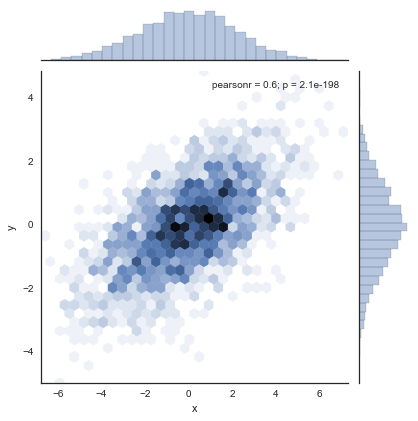

In [22]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='hex')

## Pairplots

In [23]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


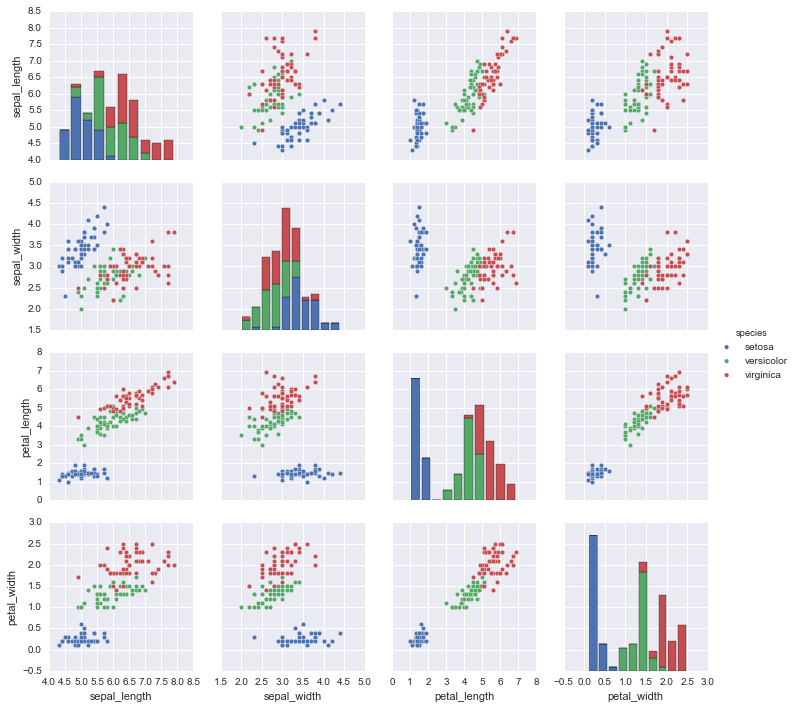

In [27]:
sns.pairplot(iris,hue='species',size=2.5)

## Faceted Histograms

Seaborn's `FacetGrid` 

In [29]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
tips['tip_pct'] = 100*tips['tip']/tips['total_bill']

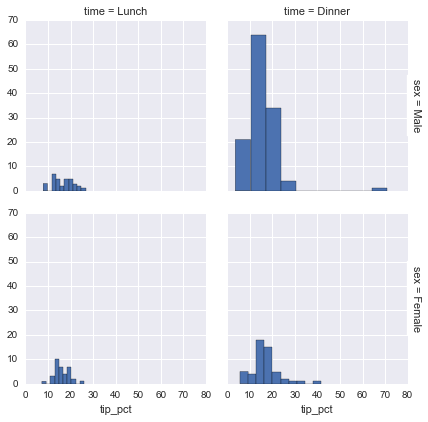

In [32]:
grid = sns.FacetGrid(tips, row='sex',col='time',margin_titles=True)
grid.map(plt.hist, 'tip_pct')

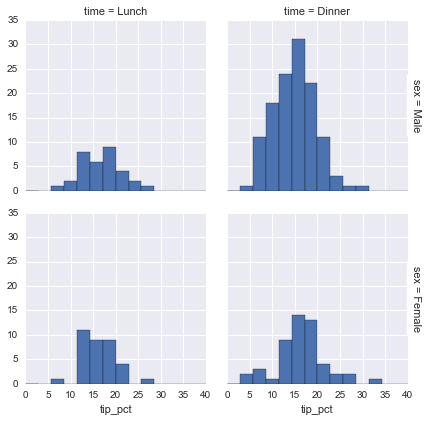

In [40]:
grid = sns.FacetGrid(tips, row='sex',col='time',margin_titles=True)
grid.map(plt.hist, 'tip_pct',bins=np.linspace(0,40,15))

## Factor Plots

   

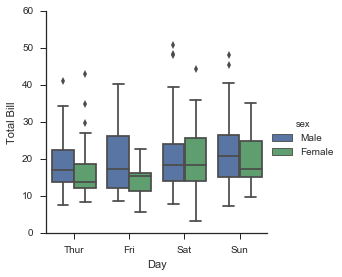

In [75]:
with sns.axes_style('ticks'):
    g = sns.factorplot(x='day',y='total_bill',hue='sex',data=tips,kind='box')
    g.set_axis_labels('Day', 'Total Bill')

## Joint Distribution

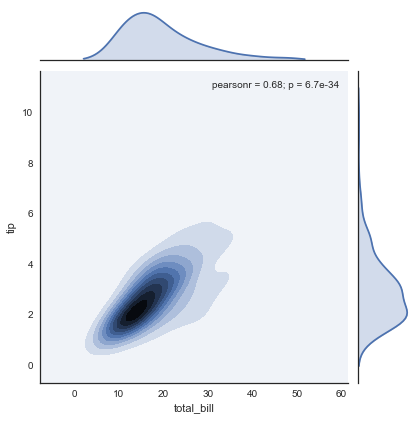

In [52]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='kde')

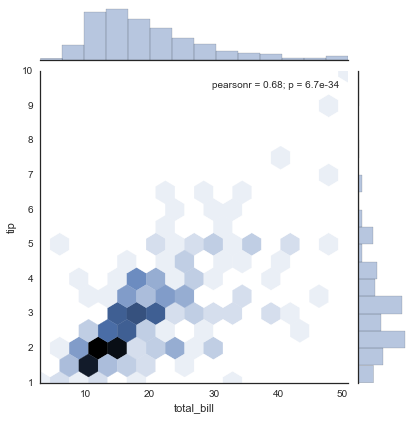

In [53]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='hex')

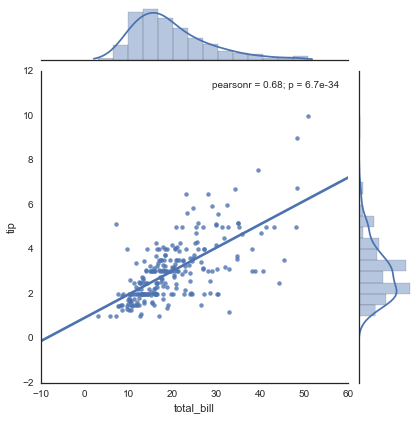

In [55]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='reg',ci=None)

## Bar Plots

In [56]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


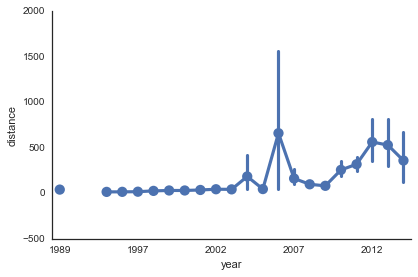

In [67]:
with sns.axes_style('white'):
    g = sns.factorplot('year','distance',data=planets,aspect=1.5)
    g.set_xticklabels(step=5)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/categorical.py:3304: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


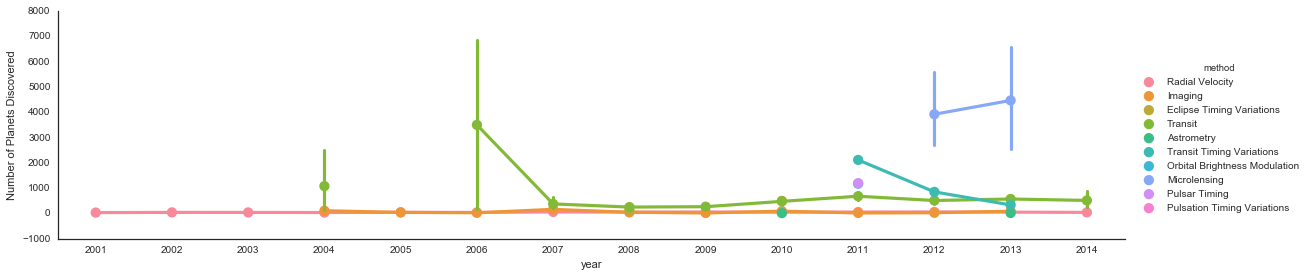

In [71]:
with sns.axes_style('white'):
    g = sns.factorplot(x='year',y='distance', data=planets, aspect=4.0,hue='method', x_order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')
    